Di kernel ini, saya membuat Pengklasifikasi Pohon Keputusan untuk memprediksi keselamatan mobil. Saya membuat dua model, satu dengan kriteria `indeks gini` dan satu lagi dengan kriteria `entropi`. Saya menerapkan Klasifikasi Pohon Keputusan dengan Python dan Scikit-Learn.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Decision Tree algorithm](#1)
2.	[Classification and Regression Trees](#2)
3.	[Decision Tree algorithm terminology](#3)
4.	[Decision Tree algorithm intuition](#4)
5.	[Attribute selection measures](#5)
    - 5.1 [Information gain](#5.1)
    - 5.2 [Gini index](#5.2)
6.	[Overfitting in Decision-Tree algorithm](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Decision Tree classifier with criterion gini-index](#13)
14.	[Decision Tree classifier with criterion entropy](#14)
15.	[Confusion matrix](#15)
16.	[Classification report](#16)
17.	[Results and conclusion](#17)
18. [References](#18)


Algoritme Pohon Keputusan adalah salah satu algoritma pembelajaran mesin yang paling populer. Ia menggunakan struktur seperti pohon dan kemungkinan kombinasinya untuk memecahkan masalah tertentu. Ini termasuk dalam kelas algoritma pembelajaran terawasi yang dapat digunakan untuk tujuan klasifikasi dan regresi.


Pohon keputusan adalah struktur yang mencakup simpul akar, cabang, dan simpul daun. Setiap node internal menunjukkan pengujian pada suatu atribut, setiap cabang menunjukkan hasil pengujian, dan setiap node daun memegang label kelas. Node paling atas pada pohon adalah node akar.


Kami membuat beberapa asumsi saat menerapkan algoritma Pohon Keputusan. Ini tercantum di bawah ini: -

1. Pada awalnya, seluruh rangkaian pelatihan dianggap sebagai root.
2. Nilai fitur harus bersifat kategoris. Jika nilainya kontinu maka nilainya akan didiskritisasi sebelum membuat model.
3. Catatan didistribusikan secara rekursif berdasarkan nilai atribut.
4. Urutan penempatan atribut sebagai akar atau simpul internal pohon dilakukan dengan menggunakan beberapa pendekatan statistik.


Saya akan menjelaskan terminologi Pohon Keputusan di bagian selanjutnya.

#**2. Pohon Klasifikasi dan Regresi (CART)** <a class="anchor" id="2"></a>

[Daftar Isi](#0.1)


Saat ini, algoritma Decision Tree dikenal dengan nama modern **CART** yang merupakan singkatan dari **Classification and Regression Trees**. Pohon Klasifikasi dan Regresi atau **CART** adalah istilah yang diperkenalkan oleh Leo Breiman untuk merujuk pada algoritma Pohon Keputusan yang dapat digunakan untuk masalah klasifikasi dan pemodelan regresi.


Algoritme CART memberikan landasan untuk algoritme penting lainnya seperti pohon keputusan yang dikantongi, hutan acak, dan pohon keputusan yang ditingkatkan. Di kernel ini, saya akan memecahkan masalah klasifikasi. Jadi, saya akan merujuk algoritma ini juga sebagai masalah Klasifikasi Pohon Keputusan.

#**3. Terminologi algoritme Pohon Keputusan** <a class="anchor" id="3"></a>

[Daftar Isi](#0.1)


- Dalam algoritma Pohon Keputusan, terdapat struktur seperti pohon di mana setiap simpul internal mewakili pengujian suatu atribut, setiap cabang mewakili hasil pengujian, dan setiap simpul daun mewakili label kelas. Jalur dari simpul akar ke simpul daun mewakili aturan klasifikasi.

- Kita dapat melihat bahwa ada beberapa terminologi yang terlibat dalam algoritma Decision Tree. Istilah-istilah yang terlibat dalam algoritma Decision Tree adalah sebagai berikut: -


## **Node Akar**

- Mewakili seluruh populasi atau sampel. Ini selanjutnya dibagi menjadi dua atau lebih himpunan homogen.


## **Pemisahan**

- Ini adalah proses membagi sebuah node menjadi dua atau lebih sub-node.


## Node Keputusan

- Ketika sebuah sub-node dipecah menjadi sub-node selanjutnya, maka itu disebut node keputusan.


## Daun/Node Terminal

- Node yang tidak terpecah disebut node Leaf atau Terminal.


## Pemangkasan

- Saat kita menghapus sub-node dari node keputusan, proses ini disebut pemangkasan. Ini adalah kebalikan dari proses pemisahan.


## Cabang/Sub-Pohon

- Subbagian dari keseluruhan pohon disebut cabang atau subpohon.


## Node Induk dan Anak

- Suatu node yang terbagi menjadi beberapa sub node disebut node induk dari sub node dimana sub node tersebut merupakan anak dari node induk.


Terminologi di atas diwakili dengan jelas dalam diagram berikut: -

### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

#**4. Intuisi algoritme Pohon Keputusan** <a class="anchor" id="4"></a>

[Daftar Isi](#0.1)

Algoritme Pohon Keputusan adalah salah satu algoritme pembelajaran mesin terawasi yang paling sering dan banyak digunakan yang dapat digunakan untuk tugas klasifikasi dan regresi. Intuisi dibalik algoritma Decision-Tree sangat mudah untuk dipahami.


Intuisi algoritma Decision Tree adalah sebagai berikut: -


1. Untuk setiap atribut dalam dataset, algoritma Decision-Tree membentuk sebuah node. Atribut yang paling penting ditempatkan pada simpul akar.

2. Untuk mengevaluasi tugas yang ada, kita mulai dari simpul akar dan terus menuruni pohon dengan mengikuti simpul terkait yang memenuhi kondisi atau keputusan kita.

3. Proses ini berlanjut hingga simpul daun tercapai. Ini berisi prediksi atau hasil dari Pohon Keputusan.

#**5. Ukuran pemilihan atribut** <a class="anchor" id="5"></a>

[Daftar Isi](#0.1)


Tantangan utama#**5. Ukuran pemilihan atribut** <a class="anchor" id="5"></a>

[Daftar Isi](#0.1)


Tantangan utama dalam implementasi Decision Tree adalah mengidentifikasi atribut yang kami anggap sebagai node akar dan setiap level. Proses ini dikenal sebagai **pemilihan atribut**. Ada ukuran pemilihan atribut yang berbeda untuk mengidentifikasi atribut yang dapat dianggap sebagai node akar di setiap level.


Ada 2 ukuran pemilihan atribut yang populer. Mereka adalah sebagai berikut: -


- **Perolehan informasi**

- **Indeks Gini**


Saat menggunakan **Perolehan informasi** sebagai kriteria, kami mengasumsikan atribut bersifat kategoris dan untuk atribut **indeks Gini** menandakan kontinuitas. Langkah-langkah pemilihan atribut ini yang dijelaskan di bawah ini.ge dalam implementasi Decision Tree adalah mengidentifikasi atribut-atribut yang kita anggap sebagai node akar dan setiap levelnya. Proses ini dikenal sebagai **pemilihan atribut**. Ada ukuran pemilihan atribut yang berbeda untuk mengidentifikasi atribut yang dapat dianggap sebagai node akar di setiap level.


Ada 2 ukuran pemilihan atribut yang populer. Mereka adalah sebagai berikut: -


- **Perolehan informasi**

- **Indeks Gini**


Saat menggunakan **Perolehan informasi** sebagai kriteria, kami mengasumsikan atribut bersifat kategoris dan untuk atribut **indeks Gini** diasumsikan kontinu. Langkah-langkah pemilihan atribut ini dijelaskan di bawah ini.

## **5.1 Perolehan informasi** <a class="anchor" id="5.1"></a>

[Daftar Isi](#0.1)


Dengan menggunakan perolehan informasi sebagai kriteria, kami mencoba menggambarkan informasi yang terkandung dalam setiap atribut. Untuk memahami konsep Information Gain, kita perlu mengetahui konsep lain yang disebut **Entropy**.

## **Entropi**

Entropi mengukur pengotor dalam kumpulan data tertentu. Dalam Fisika dan Matematika, entropi disebut sebagai keacakan atau meneliti suatu variabel acak X. Dalam teori informasi, entropi mengacu pada ketidakmurnian dalam sekelompok contoh. **Perolehan informasi** adalah penurunan entropi. Perolehan informasi perhitungan perbedaan antara entropi sebelum dan entropi rata-rata setelah diskon kumpulan data berdasarkan nilai atribut yang diberikan.

Entropi digambarkan dengan rumus berikut: -

![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

Algoritma Pohon Keputusan ID3 (Iterative Dichotomiser) menggunakan entropi untuk menghitung perolehan informasi. Jadi, dengan menghitung penurunan **ukuran entropi** setiap atribut, kita dapat menghitung perolehan informasinya. Atribut dengan perolehan informasi tertinggi dipilih sebagai atribut pemisah pada node.

## **5.2 Indeks Gini** <a class="anchor" id="5.2"></a>

[Daftar Isi](#0.1)


Ukuran pemilihan atribut lain yang digunakan **CART (Pohon Kategoris dan Regresi)** adalah **indeks Gini**. Ia menggunakan metode Gini untuk membuat titik split.


Indeks Gini dapat direpresentasikan dengan diagram berikut: -

## **Indeks Gini**

![Indeks Gini](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Di sini, sekali lagi **c** adalah jumlah kelas dan **pi** adalah probabilitas yang terkait dengan kelas ke-i.

Indeks Gini menyatakan, jika kita secara acak memilih dua item dari suatu populasi, keduanya harus berada di kelas yang sama dan probabilitasnya adalah 1 jika populasinya murni.

Ia bekerja dengan variabel target kategori "Sukses" atau "Kegagalan". Ia hanya melakukan pemisahan biner. Semakin tinggi nilai Gini maka semakin tinggi pula homogenitasnya. CART (Pohon Klasifikasi dan Regresi) menggunakan metode Gini untuk membuat pemisahan biner.

Langkah-langkah Menghitung Gini untuk perpecahan

1. Hitung Gini untuk sub-node, menggunakan rumus jumlah kuadrat probabilitas keberhasilan dan kegagalan (p^2+q^2).

2. Hitung Gini untuk pemisahan menggunakan skor Gini tertimbang dari setiap node pemisahan tersebut.


Dalam hal atribut bernilai diskrit, subset yang memberikan indeks gini minimum untuk atribut yang dipilih dipilih sebagai atribut pemisahan. Dalam kasus atribut bernilai kontinu, strateginya adalah memilih setiap pasangan nilai yang berdekatan sebagai kemungkinan titik pisah dan titik dengan indeks gini yang lebih kecil dipilih sebagai titik pisah. Atribut dengan indeks Gini minimum dipilih sebagai atribut pemisah.

#**6. Overfitting dalam algoritma Decision Tree** <a class="anchor" id="6"></a>

[Daftar Isi](#0.1)


Overfitting adalah masalah praktis saat membangun model Pohon Keputusan. Masalah overfitting dipertimbangkan ketika algoritme terus melangkah lebih dalam untuk mengurangi kesalahan set pelatihan tetapi menghasilkan kesalahan set pengujian yang meningkat. Jadi, keakuratan prediksi model kami menurun. Hal ini umumnya terjadi ketika kita membangun banyak cabang karena adanya outlier dan ketidakteraturan data.

Dua pendekatan yang dapat digunakan untuk menghindari overfitting adalah sebagai berikut:-

- Pra-Pemangkasan

- Pasca Pemangkasan


## **Pra-Pemangkasan**

Pada pra-pemangkasan, kami menghentikan pembangunan pohon sedikit lebih awal. Kami memilih untuk tidak membagi sebuah node jika ukuran kebaikannya berada di bawah nilai ambang batas. Namun sulit untuk memilih titik perhentian yang tepat.


## **Pasca Pemangkasan**

Pada pasca-pemangkasan, kita masuk lebih dalam ke dalam pohon untuk membangun pohon yang utuh. Jika pohon menunjukkan masalah overfitting maka pemangkasan dilakukan sebagai langkah pasca pemangkasan. Kami menggunakan data validasi silang untuk memeriksa efek pemangkasan kami. Dengan menggunakan data validasi silang, kami menguji apakah perluasan node akan menghasilkan peningkatan atau tidak. Jika sudah menunjukkan perbaikan, maka kita bisa melanjutkan dengan memperluas node tersebut. Namun jika menunjukkan penurunan akurasi maka sebaiknya tidak diperluas. Jadi, node tersebut harus diubah menjadi node daun.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [7]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Display the DataFrame
df.head()



Saving car_evaluation.csv to car_evaluation.csv


vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

#**9. Analisis data eksplorasi** <a class="anchor" id="9"></a>

[Daftar Isi](#0.1)


Sekarang, saya akan mengeksplorasi data untuk mendapatkan wawasan tentang data tersebut.

In [8]:
# view dimensions of dataset

df.shape

(1727, 7)

Kita dapat melihat ada 1728 instance dan 7 variabel dalam kumpulan data.

### View top 5 rows of dataset

In [9]:
# preview the dataset

df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

### Ganti nama nama kolom

Kita dapat melihat bahwa kumpulan data tidak memiliki nama kolom yang tepat. Kolom hanya diberi label 0,1,2.... dan seterusnya. Kita harus memberi nama yang tepat pada kolomnya. Saya akan melakukannya sebagai berikut: -

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
# let's again preview the dataset

df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc

Kita dapat melihat bahwa nama kolom diganti namanya. Sekarang, kolom-kolom tersebut memiliki nama yang bermakna.

### View summary of dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Distribusi frekuensi nilai dalam variabel

Sekarang, saya akan memeriksa jumlah frekuensi variabel kategori.

In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())


high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Kita dapat melihat bahwa `pintu` dan `orang` bersifat kategoris. Jadi, saya akan memperlakukannya sebagai variabel kategori.

### Summary of variables


- There are 7 variables in the dat### Ringkasan variabel


- Ada 7 variabel dalam dataset. Semua variabel bertipe data kategorikal.


- Ini diberikan oleh `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` dan `class`.


- `kelas` adalah variabel target.aset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [14]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

Variabel target `kelas` bersifat ordinal.

### Missing values in variables

In [15]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Kita dapat melihat bahwa tidak ada nilai yang hilang dalam dataset. Saya telah memeriksa distribusi frekuensi nilai sebelumnya. Ini juga mengonfirmasi bahwa tidak ada nilai yang hilang dalam kumpulan data.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [16]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

#**12. Rekayasa Fitur** <a class="anchor" id="12"></a>

[Daftar Isi](#0.1)


**Rekayasa Fitur** adalah proses mengubah data mentah menjadi fitur berguna yang membantu kami memahami model dengan lebih baik dan meningkatkan kekuatan prediktifnya. Saya akan melakukan rekayasa fitur pada berbagai jenis variabel.


Pertama, saya akan memeriksa kembali tipe data variabel.

In [19]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Mengkodekan variabel kategorikal


Sekarang, saya akan menyandikan variabel kategori.

In [20]:
X_train.head()

buying  maint  doors persons lug_boot safety
83    vhigh  vhigh  5more       2      med    low
48    vhigh  vhigh      3    more      med    med
468    high  vhigh      3       4    small    med
155   vhigh   high      3    more      med    low
1043    med   high      4    more    small    low

In [22]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [23]:
import category_encoders as ce


Kita dapat melihat bahwa semua variabel adalah tipe data kategorikal ordinal.

In [25]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [26]:
X_train.head()

buying  maint  doors  persons  lug_boot  safety
83         1      1      1        1         1       1
48         1      1      2        2         1       2
468        2      1      2        3         2       2
155        1      2      2        2         1       1
1043       3      2      3        2         2       1

In [27]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
599        2      2      3        1         3       1
932        3      1      3        3         3       1
628        2      2      1        1         3       3
1497       4      2      1        3         1       2
1262       3      4      3        2         1       1

Kami sekarang memiliki set pelatihan dan pengujian yang siap untuk pembuatan model.

# **13. Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [29]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


In [31]:
from sklearn.tree import DecisionTreeClassifier


In [32]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [33]:
y_pred_gini = clf_gini.predict(X_test)


### Check accuracy score with criterion gini index

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Bandingkan keakuratan rangkaian pelatihan dan rangkaian pengujian


Sekarang, saya akan membandingkan akurasi set kereta dan set pengujian untuk memeriksa overfitting.

In [35]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


### Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


Di sini, skor akurasi set pelatihan adalah 0,7865 sedangkan akurasi set tes menjadi 0,8021. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.

### Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

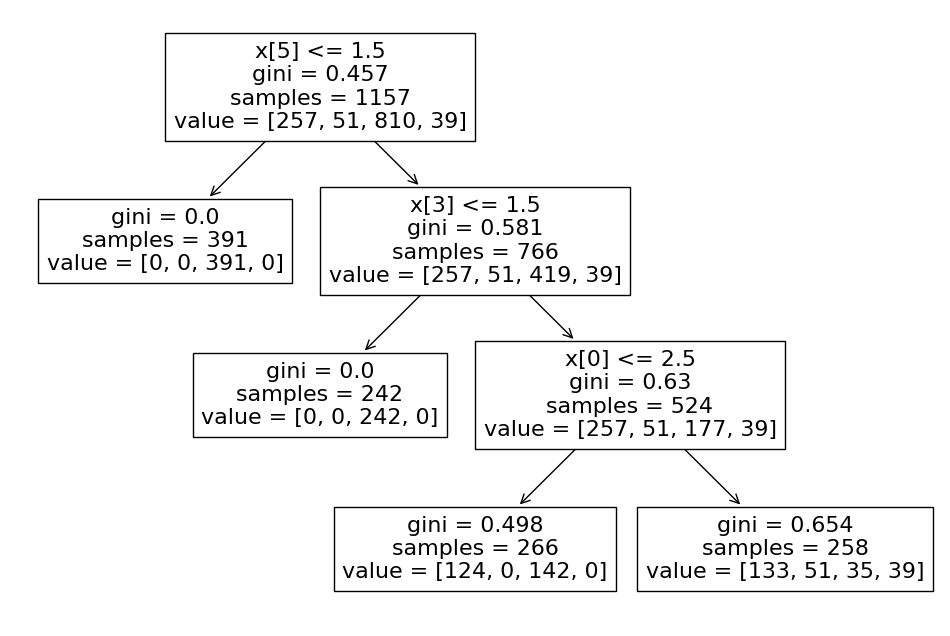

In [38]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

### Visualize decision-trees with graphviz

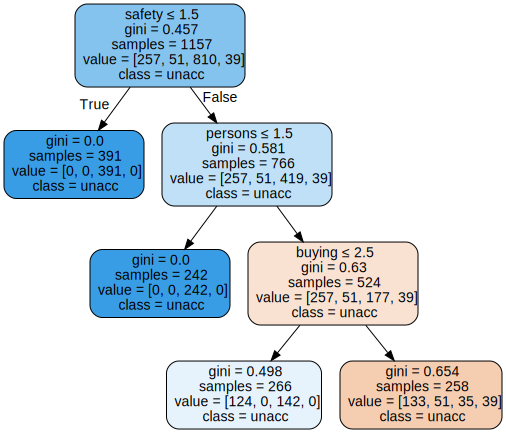

In [39]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

# **14. Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [40]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [41]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


### Bandingkan keakuratan rangkaian pelatihan dan rangkaian pengujian


Sekarang, saya akan membandingkan akurasi set kereta dan set pengujian untuk memeriksa overfitting.

In [43]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [44]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


### Check for overfitting and underfitting

In [45]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


Kita dapat melihat bahwa skor set pelatihan dan skor set tes sama seperti di atas. Skor akurasi set pelatihan sebesar 0,7865 sedangkan akurasi set tes sebesar 0,8021. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.

### Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

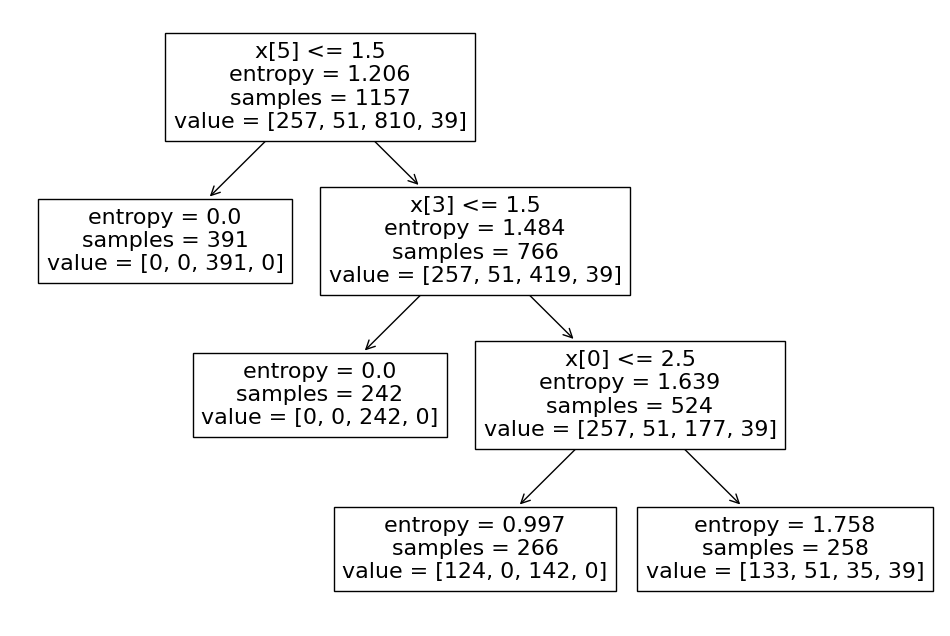

In [46]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

### Visualize decision-trees with graphviz

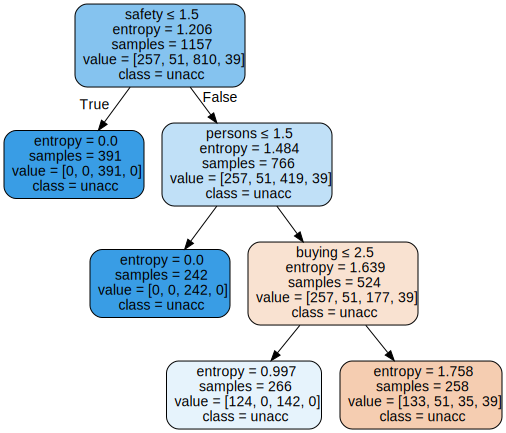

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Matriks kebingungan** <a class="anchor" id="15"></a>

[Daftar Isi](#0.1)


Matriks konfusi adalah alat untuk meringkas kinerja algoritma klasifikasi. Matriks konfusi akan memberi kita gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Ini memberi kita ringkasan prediksi yang benar dan salah yang dikelompokkan berdasarkan setiap kategori. Ringkasan disajikan dalam bentuk tabel.


Empat jenis hasil mungkin terjadi saat mengevaluasi kinerja model klasifikasi. Keempat hasil ini dijelaskan di bawah ini:-


**True Positives (TP)** – True Positives terjadi ketika kita memperkirakan suatu observasi termasuk dalam kelas tertentu dan observasi tersebut benar-benar termasuk dalam kelas tersebut.


**True Negatives (TN)** – True Negatives terjadi ketika kita memperkirakan suatu observasi tidak termasuk dalam kelas tertentu dan observasi tersebut sebenarnya tidak termasuk dalam kelas tersebut.


**False Positives (FP)** – False Positive terjadi ketika kita memperkirakan suatu observasi termasuk dalam kelas tertentu namun observasi tersebut sebenarnya tidak termasuk dalam kelas tersebut. Jenis kesalahan ini disebut **Kesalahan tipe I.**



**False Negatives (FN)** – False Negatives terjadi ketika kita memperkirakan suatu observasi tidak termasuk dalam kelas tertentu tetapi observasi tersebut sebenarnya termasuk dalam kelas tersebut. Ini adalah kesalahan yang sangat serius dan disebut **Kesalahan Tipe II.**



Keempat hasil ini dirangkum dalam matriks kebingungan yang diberikan di bawah ini.

In [48]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


#**16. Laporan Klasifikasi** <a class="anchor" id="16"></a>

[Daftar Isi](#0.1)


**Laporan klasifikasi** adalah cara lain untuk mengevaluasi performa model klasifikasi. Ini menampilkan skor **precision**, **recall**, **f1** dan **support** untuk model. Saya telah menjelaskan istilah-istilah ini nanti.

Kami dapat mencetak laporan klasifikasi sebagai berikut: -

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



#**17. Hasil dan kesimpulan** <a class="anchor" id="17"></a>

[Daftar Isi](#0.1)


1. Dalam proyek ini, saya membuat model Pengklasifikasi Pohon Keputusan untuk memprediksi keselamatan mobil. Saya membuat dua model, satu dengan kriteria `indeks gini` dan satu lagi dengan kriteria `entropi`. Model ini menghasilkan kinerja yang sangat baik yang ditunjukkan oleh akurasi model pada kedua kasus yaitu 0,8021.
2. Pada model dengan kriteria `gini indeks`, skor akurasi set pelatihan adalah 0,7865 sedangkan akurasi set tes menjadi 0,8021. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.
3. Demikian pula, pada model dengan kriteria `entropi`, skor akurasi set pelatihan adalah 0,7865 sedangkan akurasi set tes menjadi 0,8021. Kita mendapatkan nilai yang sama seperti dalam kasus dengan kriteria `gini`. Jadi, tidak ada tanda-tanda overfitting.
4. Dalam kedua kasus tersebut, skor akurasi set pelatihan dan set tes adalah sama. Ini mungkin terjadi karena kumpulan data yang kecil.
5. Matriks konfusi dan laporan klasifikasi menghasilkan performa model yang sangat baik.

#**18. Referensi** <a class="anchor" id="18"></a>

[Daftar Isi](#0.1)


Pekerjaan yang dilakukan dalam proyek ini terinspirasi dari buku dan situs web berikut: -

1. Pembelajaran Mesin Langsung dengan Scikit-Learn dan Tensorflow oleh Aurélién Géron

2. Pengantar Pembelajaran Mesin dengan Python oleh Andreas C. Müller dan Sarah Guido

3. https://en.wikipedia.org/wiki/Decision_tree

4. https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

5. https://en.wikipedia.org/wiki/Entropy_(informasi_teori)

6. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

7. https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

8. https://acadgild.com/blog/decision-tree-python-code